# Milan AirBnB Exploratory data analysis  
An exercise developed for CodeOp Module 3 milestone  

- Author: Margherita Serena Ferrara  
- Date: 25/11/2023  
- Contact: margheritaserena.ferrara@gmail.com

## Introduction  

This notebook illustrates an exploratory data analysis performed on the Milan AirBnB listings datasets provided by [Inside AirBnB](http://insideairbnb.com/). 
In particular for the purpose of this analysis, two datasets have been used:
- listings: listings registered on AirBnB in Milan as of September 2023
- calendar: listings availability and prices between September 2023 and September 2024

### Preliminary steps
The data used is collected and already processed by Inside AirBnB. However, some additional cleaning steps have been implemented for the purpose of this analysis.  
In particular, I have implemented the following cleaning steps:
- **removing entries which have a missing entry in the column bedroom**. AirBnB allows to select listings that have one or more bedrooms. It would have been reasonable to assume that listings with NA bedroom would be shared rooms (eg hostels). However, the data shows that most of these entries are actually recorded under 'Private rooms'. Since Inside AirBnB does not provide and explanation for such entries, I have disregarded these observations.
- **removing outliers in terms of prices.** It was found that some listings were recorded with extremely high prices per night (the highest was recorded with a price of €90,000). Having researched on AirBnb the higest listing prices, I found that, besides one listing at ~€8,000 per night and one at €900, the most expensive listings were below €700. I have therefore used removed those observations with a price above €700. Further explorations on how to deal with outliers should be done in the future, considering alternative approaches like IQR rule, or contacting Inside AirBnB to ensure better recordings of the data.
- **removing observations with missing price.** Few observations in the calendar dataset presented NA price. It was expected that these observations are relative to when the listing is not available. However, the data shows otherwise. For this reason, the observations were dropped.


### Main findings
- Price distribution by property features hows that:
    - The number of listings in hotels much smaller than those listed as entire homes or private rooms. This seems to be in line with the fact that AirBnB was developed mostly to rent private properties.
    - Most listings are categorised as 'Entire homes'
    - The median price of listings in hotel rooms is the highest, however, not substantially
    - There is a long tail of observations above the 75th percentile in the Entire home category.
<p>&nbsp;</p>

- The price distribution by number of bedrooms shows that:
    - Price increases as the number of bedrooms is higher.
<p>&nbsp;</p>

- Price and listings distribution by neighbourhoods shows that:
    - The Buenos aires - Venezia neighbourhood is the one hosting the nighest number of listings. Followed by other central areas such as Duomo and Sarpi.
    - Interestingly, the neighbourhoods with the higest median and average prices are Duomo, Brera and Guastalla. These findings are inline with expectations, as these are some of the most central areas in the city. Although included in the category 'Other' Parco Sempione is also one of the areas with highest median price.
    - The top 5 neighbourhoods include ~31% of all available listings. The percentage approaches 50% when looking at the top 10. The remaining of the listings are distributed across the remaining 76 neighbourhoods.   
<p>&nbsp;</p>

- Observing the evolution of prices over time it was found that:
    - Over 70% of the listings currently available in Milan are booked with different prices based on the date.
    - The data present an overall upward trend of the mean price over time, with peaks around end of 2023 and early 2024, end of April and early July.  
        - As expected, two of these peaks correspond to the Winter and summer holidays. Interestingly the highest peak occurs at the end of April, which corresponds to when the Salone Internazionale del Mobile is happening. Salone Internazionale del Mobile is an international furniture fair, and the largest trade fair in the world.  
        - Given this, it may be likely that the amount of people that the fair attracts is above the quantity of tourists visiting the city during the holiday periods, therefore creating more demand for accommodation.  
        It would also be reasonable to expect that the people coming to Milan for the fair may be entrepreneurs and tradesmen and women and, given the business nature of their visit, they may also be willing to pay extra to find accommodation. This could be another  driver of such peak in April. 

        - It is interesting to note that, although to a less extend the same trends are visible for the median price. This suggests that the trend observed with the average price is not solely driven by listings with extremely high prices.

### Limitations and next steps

- The analysis below relies on assumptions that the outliers identified and disregarded arise from clergical errors.  Further work should be done to ensure that the data used is accurante.
- Further analysis could be performed to investigate more in depth additional factors that may influence listings prices.
- Additionally, it would be interesting to put the observations found above in relation to various socio-demographic characteristics of Milan's neighbourhoods and information relative to the listings renters.
- Finally, additional analysis could be performed on the listings availability.

## Section 1: Import data & clean data

In this section, the listings and calendar datasets are imported and cleaned.


### 1.0 Set up  
  
Importing the relevant packages and setting up the working folders

In [2]:
# Import revelant packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import folium
import os
from folium.plugins import HeatMap
from branca.colormap import LinearColormap

# Get folder paths
working_folder = os.getcwd()
parent_folder = os.path.dirname(working_folder)

### 1.1 Listings dataset  
  
This dataset contains various information relative to the listings registered on AirBnB in Milan as of September 2023 

The following steps are implemented in this section:
- Import dataset
- Explore data available (to identify the variables format and any potential issue)
- Identify the data identifier
- Deal with missing values
- Formatting of variables such as price, which is recorded as a string.
- Dropping outliers

#### 1.1.1 Import dataset

In [3]:
listings = pd.read_csv(parent_folder+'/MI AirBnB - dataset/listings.csv', delimiter = ',')

#### 1.1.2 Explore data available
  
The methods ```info``` allows to review the variables available, as well as their type and the occurrences of missing values.  
This information is used in the following sections. 

In [4]:
# Explore the data
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24177 entries, 0 to 24176
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24177 non-null  int64  
 1   listing_url                                   24177 non-null  object 
 2   scrape_id                                     24177 non-null  int64  
 3   last_scraped                                  24177 non-null  object 
 4   source                                        24177 non-null  object 
 5   name                                          24177 non-null  object 
 6   description                                   23761 non-null  object 
 7   neighborhood_overview                         13101 non-null  object 
 8   picture_url                                   24177 non-null  object 
 9   host_id                                       24177 non-null 

##### 1.1.2.A Unique identifier  
  
Since the dataset is expected to contain the list of listings registered on AirBnB in Milan as of September 2023, it is expected that each entry of the dataset is relative to a single listing (meaning, there are no duplicated ids).  
This is inspected by looking at the variable ```id``` and checking whether the number of unique ids in the datasets correpond to the number of dataset observations.

In [5]:
print(f"The datasets contains {listings['id'].nunique()} unique ids. The dataset contains {listings.shape[0]} obsevations")
if (listings['id'].nunique() == listings.shape[0]):
    print("There are no issues with the variable id.")

The datasets contains 24177 unique ids. The dataset contains 24177 obsevations
There are no issues with the variable id.


Given that the code above there seem to be no issues with the variable ```id```.

#### 1.1.3 Missing values  
  
Missing values can occur for various reasons, such as errors during data collection, data entry issues, or intentional non-responses.  
In this section we deal with missing values by making the decision to drop some of these instances.

##### 1.1.3.A Drop fully missing variables  

Empty rows are dropped as they are not informative

In [6]:
listings = listings.dropna(axis=1, how='all')

##### 1.1.3.B Explore other variables that contain NAs  
  
For some variables, only a subset of observations is missing. In this section we explore which variables are and process the data based on whether the NAs are deemed to generate or not.

In [7]:
# Show variables that contain missing entris
listings.columns[listings.isna().any()]

Index(['description', 'neighborhood_overview', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'neighbourhood',
       'bathrooms_text', 'bedrooms', 'beds', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'reviews_per_month'],
      dtype='object')

One of the variables that contain NA values is ```bedrooms```. Below I explore this further to understand the amount of missing values and whether there are explanations for this.

In [8]:
listings['bedrooms'].value_counts(dropna=False)

bedrooms
1.0     14361
NaN      5430
2.0      3657
3.0       587
4.0       103
5.0        27
6.0         5
7.0         3
10.0        2
8.0         1
11.0        1
Name: count, dtype: int64

AirBnB allows to select listings that have one or more bedrooms, therefore it seems odd that more tahn 5,000 entries are recorded without this information.  

This issue is furthe explored by looking at how these observations are distributed based on the variable ```property_type```, which records whether the listing is for an entire place, a private room or a shared room.  
Since studios are listed on the website as "one bedrooms" it would see that listings with NA bedroom would be shared rooms (eg hostels).

In [9]:
listings[listings['bedrooms'].isna()]['room_type'].value_counts(dropna=False)

room_type
Private room       3762
Entire home/apt    1402
Shared room         266
Name: count, dtype: int64

Of the 5430 listings with NA bedrooms, the majority are recorded as 'Private rooms'.  
Given the counterintuitivity of this finding, I drop these entries.

In [10]:
#Store these observations in another dataset
listings_no_bedroom = listings[listings['bedrooms'].isna()]

listings = listings.dropna(subset=['bedrooms'])
# Check that observations have been dropped
listings[listings['bedrooms'].isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


Focussing again on the remaining variables containing NA values

In [11]:
listings.columns[listings.isna().any()]

Index(['description', 'neighborhood_overview', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'neighbourhood',
       'bathrooms_text', 'beds', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'reviews_per_month'],
      dtype='object')

The remaining variables containing NA values are not expected to create issues for the purpose of this analysis. No other variable is dropped.

#### 1.1.4 Format variables  
  
In this section variables are cleaned and set up in the correct format.

Based on ```listings.info()``` shows that two variables may not be in the correct format ```price``` and ```calendar_last_scraped```.  
Since we are not interested in the latter, we focus on ```price```.

In [12]:
### Print teh variable to see which symbols are in there
listings['price'].head()

1    $150.00
2    $171.00
3     $40.00
4     $94.00
6    $220.00
Name: price, dtype: object

The above shows that before converting the variable into a float it is necessary to  remove the '$' and ',' symbols.

In [13]:
listings['price'] = listings['price'].str.replace('$', '')
# The variable price can't be immediately converted as float because the symbol ',' is not considered numerical.
listings['price'] = listings['price'].str.replace(',', '').astype(float)

# Note: quicker way to achieve this would have been with 
#   calendar['adjusted_price'] = calendar['adjusted_price'].replace('[$,]', '', regex=True).astype(float)

#### 1.1.5 Outliers  
  
The purpose of this EDA is to observe how listings price differs across neighbourhoods, or by listing type or other features.  
It is therefore fundamental that this variable is realiable.  

In this section it is found that some listings were recorded with extremely high prices per night (the highest was recorded with a price of €90,000). Having researched on AirBnb the higest listing prices, I found that, besides one listing at ~€8,000 per night and one at €900, the most expensive listings were below €700. I have therefore used removed those observations with a price above €700. Further explorations on how to deal with outliers should be done in the future, considering alternative approaches like IQR rule, or contacting Inside AirBnB to ensure better recordings of the data.  

The screeshot below shows the most expensive listings in Milan that the website currently shows:  
![AirBnB most expensive listings](./MI_AirBnB_most_expensive_listings_Euro.png)

In [14]:
# Only keep listings with price below 700 euros.
listings_no_outliers = listings[listings['price'] <= 700]

##### 1.1.5.A Outcome of price outliers cleaning process  
  
Below are shown the boxplot and histogram of the original dataset and the one with only listings below 700€.  
Further below is also presented a table summarising the main summary statistics of the variable ```price``` in the two datasets.

Text(0, 0.5, 'Number of listings')

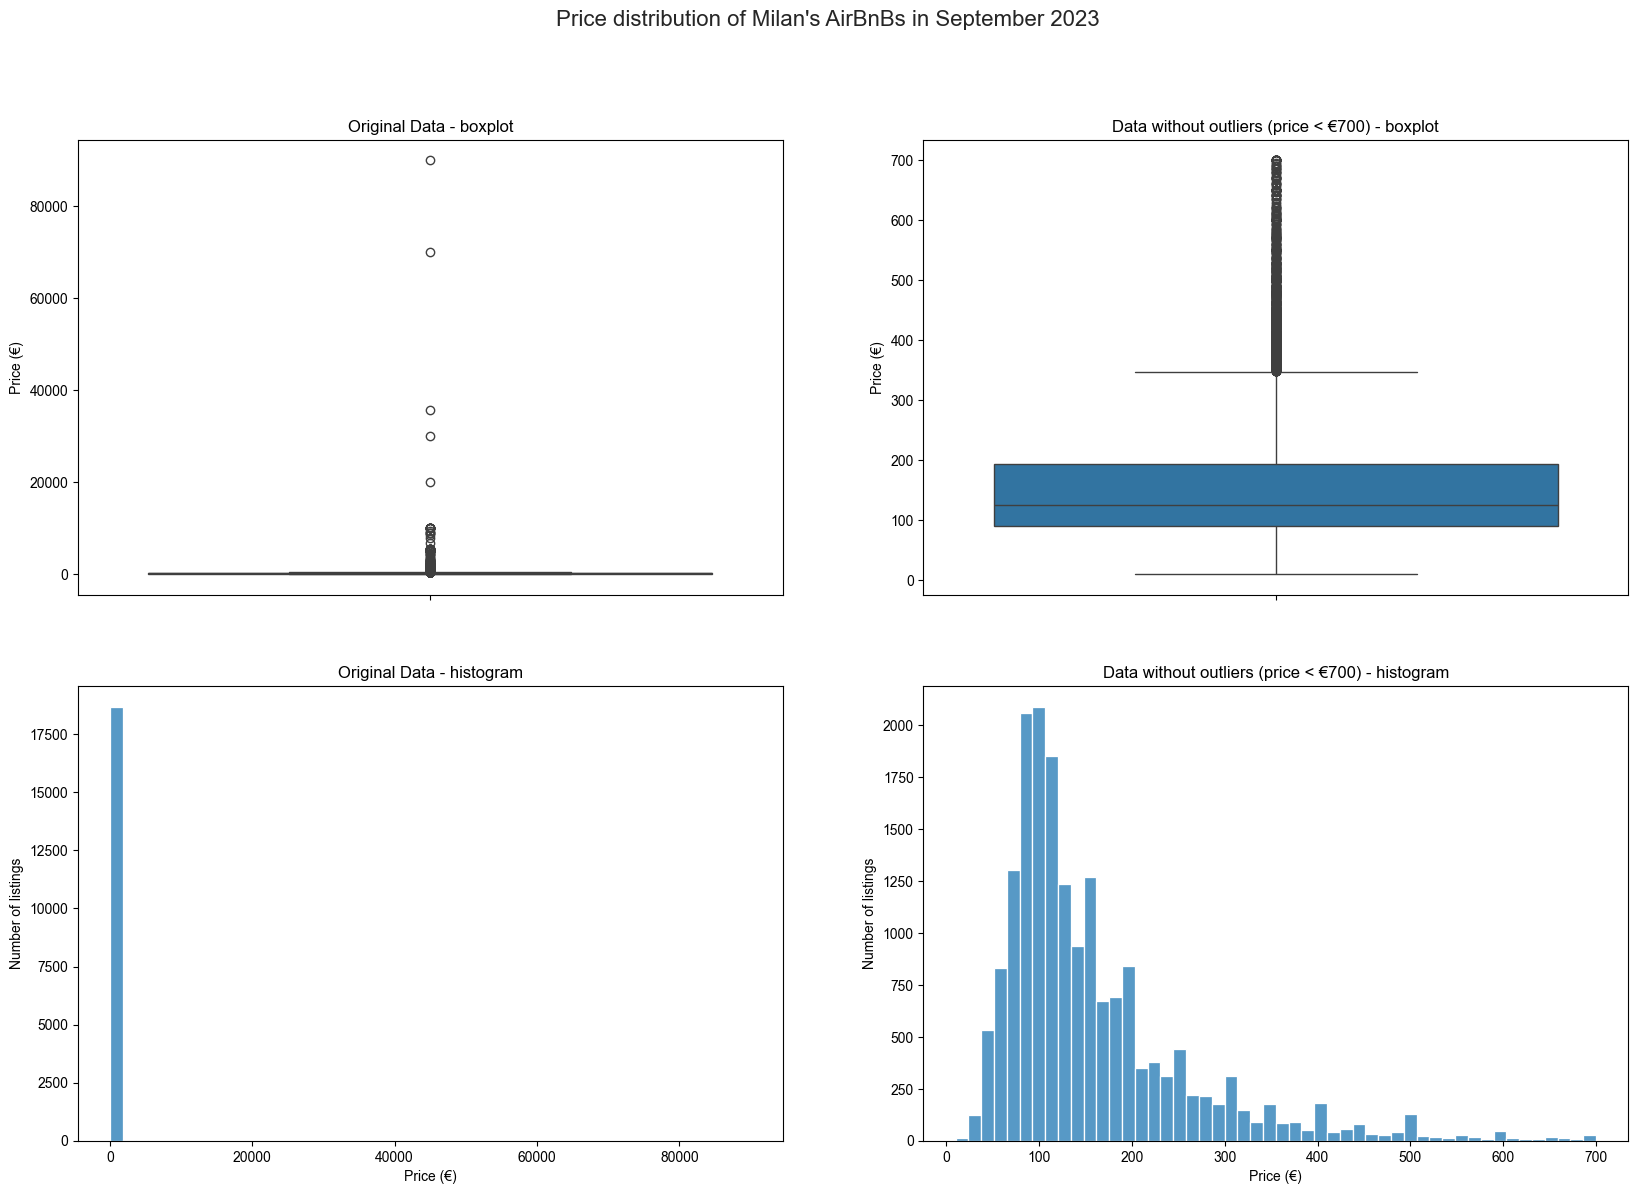

In [15]:
# Create subplot
fig, axes = plt.subplots(
    nrows=2, 
    ncols=2,
    figsize=(20,13)
)

# Set up style
sns.set_style("darkgrid")

# Title
fig.suptitle(
    "Price distribution of Milan's AirBnBs in September 2023",
    fontsize = 16)

# Price boxplot (all observations)
sns.boxplot(
    data = listings,
    y = 'price',
    ax = axes[0,0]
)
axes[0,0].set_title("Original Data - boxplot")
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("Price (€)")

# Price boxplot (without outliers)
sns.boxplot(
    data = listings_no_outliers,
    y = 'price',
    ax = axes[0,1]
)
axes[0,1].set_title("Data without outliers (price < €700) - boxplot")
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("Price (€)")

# Price histogram (all observations)
sns.histplot(
    data=listings, 
    x="price",
    bins = 50,
    ax = axes[1,0]
    )
axes[1,0].set_title("Original Data - histogram")
axes[1,0].set_xlabel("Price (€)")
axes[1,0].set_ylabel("Number of listings")

# Price histogram (without outliers)
sns.histplot(
    data=listings_no_outliers, 
    x="price",
    bins = 50,
    ax = axes[1,1]
    )
axes[1,1].set_title("Data without outliers (price < €700) - histogram")
axes[1,1].set_xlabel("Price (€)")
axes[1,1].set_ylabel("Number of listings")

In [16]:
# Show basic descritive statistics to see how they differ across datasets

# Dataset with outliers
price_stats = pd.concat(
    [
        listings['price'].describe(), 
        pd.Series(listings['price'].median(), name='Median')
        ], 
    axis=0
    )
price_stats = price_stats.rename(index={0: 'Median'})
price_stats.name = 'Price statistics (with outliers)'

# Dataset without outliers
price_stats_no_outliers = pd.concat(
    [
        listings_no_outliers['price'].describe(), 
        pd.Series(listings_no_outliers['price'].median(), name='Median')
        ], 
    axis=0
    )
price_stats_no_outliers = price_stats_no_outliers.rename(index={0: 'Median'})
price_stats_no_outliers.name = 'Price statistics (without outliers)'

# Merge datasets for ease of read
stats = pd.merge(
    price_stats, 
    price_stats_no_outliers, 
    left_index=True,
    right_index=True, 
    how = 'outer')
print(stats)

        Price statistics (with outliers)  Price statistics (without outliers)
25%                             90.00000                            90.000000
50%                            128.00000                           125.000000
75%                            200.00000                           193.000000
Median                         128.00000                           125.000000
count                        18747.00000                         18345.000000
max                          90000.00000                           700.000000
mean                           206.14333                           158.063069
min                             10.00000                            10.000000
std                            989.37974                           103.611533


The charts above show the presence of extreme values that significantly deviate from the central tendency, making the charts illegible.  
Moreover, in the dataset without outliers the mean was almost twice as the median and, despite a 75th percentile of €200 the maximum value was €90000.  

Having removed the most extreme observations the charts are more readable and the data seems more reasonable.  
In particular, the data shows that a large proportion of listings have a price around ~€75 and ~€200.  
Above €200 the number of listings is much lower. As expected there is a long tail of listings with prices that go up to €700.

In [17]:
# Rename datasets
listings_incl_outliers = listings.copy()  # Create a copy to avoid modifying the original DataFrame
listings = listings_no_outliers.copy()  # Create a copy to avoid modifying the original DataFrame

### 1.2 Calendar
  
The calendar dataset contains the listings availability and prices between September 2023 and September 2024  
   
The following steps are implemented in this section:
- Import dataset
- Explore data available (to identify the variables format and any potential issue)
- Identify the data identifier
- Deal with missing values
- Formatting of variables such as price, which is recorded as a string.
- Dropping outliers

#### 1.2.1 Import dataset

In [18]:
calendar = pd.read_csv(parent_folder+'/MI AirBnB - dataset/calendar.csv')

#### 1.2.2 Explore data available  
  
The methods ```info``` allows to review the variables available, as well as their type and the occurrences of missing values.  
This information is used in the following sections. 

In [19]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8824261 entries, 0 to 8824260
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 471.3+ MB


The above shows that the variables price, price_adjusted and date are identified as objects.  
These will be correctly formatted later in this section.

##### 1.2.2.A Unique identifiers  
  
Given that this dataset contains the listings availability and prices between September 2023 and September 2024, it is expected that the listings ids will be repeated more than once.  
Therefore this check is not performed. On the other hand, I check whether thec ```listing_id``` does not have missing values.

In [20]:
calendar[calendar['listing_id'].isna()]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights


The output above shows that there are no missing values for the variable ```listing_id```.

#### 1.2.3 Missing values  
  
Missing values can occur for various reasons, such as errors during data collection, data entry issues, or intentional non-responses.  
In this section we deal with missing values by making the decision to drop some of these instances.

In [21]:
columns_with_na = calendar.columns[calendar.isna().any()]

print(columns_with_na)

Index(['price', 'adjusted_price', 'minimum_nights', 'maximum_nights'], dtype='object')


##### 1.2.3.A Drop fully missing variables  

Empty rows are dropped as they are not informative

In [22]:
calendar = calendar.dropna(axis=1, how='all')
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8824261 entries, 0 to 8824260
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 471.3+ MB


##### 1.2.3.B Explore other variables that contain NAs  
  
```calendar.info()``` shows that no variable was fully missing.
However, some variables have NA values(). We explore these in the rest of the section.

In [23]:
# Number of observations with NA()
calendar[columns_with_na].isna().sum()

price             171
adjusted_price    171
minimum_nights     15
maximum_nights     15
dtype: int64

A relatively small amount of observations have Nas. 
It would be reasonable to assume that price is NA only in case when the listing is not available.

In [24]:
calendar['available'][calendar['price'].isna()].value_counts()

available
t    171
Name: count, dtype: int64

All observations with NA price are available. This seems counterintuitive.  
For this reason, these observations are dropped.

In [25]:
calendar = calendar.dropna(subset=['price'])

Note that all observations with NA price were also those with missing adjusted_price.

In [26]:
calendar[columns_with_na].isna().sum()

price              0
adjusted_price     0
minimum_nights    15
maximum_nights    15
dtype: int64

#### 1.2.4 Format variables  
  
In this section variables are cleaned and set up in the correct format.

Based on ```listings.info()``` shows that two variables may not be in the correct format ```price``` and ```date```.  

In [27]:
# Convert price in float
calendar['price'] = calendar['price'].replace('[$,]', '', regex=True).astype(float)
calendar['adjusted_price'] = calendar['adjusted_price'].replace('[$,]', '', regex=True).astype(float)

# Convert date in datetime
calendar['date'] = pd.to_datetime(calendar['date'], format = "%Y-%m-%d")
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8824090 entries, 0 to 8824260
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 538.6+ MB


#### 1.2.5 Outliers  
  
For consistency, the same methodology used for the dataset ```listings``` is applied here. 

In [28]:
# Only keep listings with price below 700 euros.
calendar_no_outliers = calendar[calendar['price'] <= 700]

Text(0, 0.5, 'Number of listings')

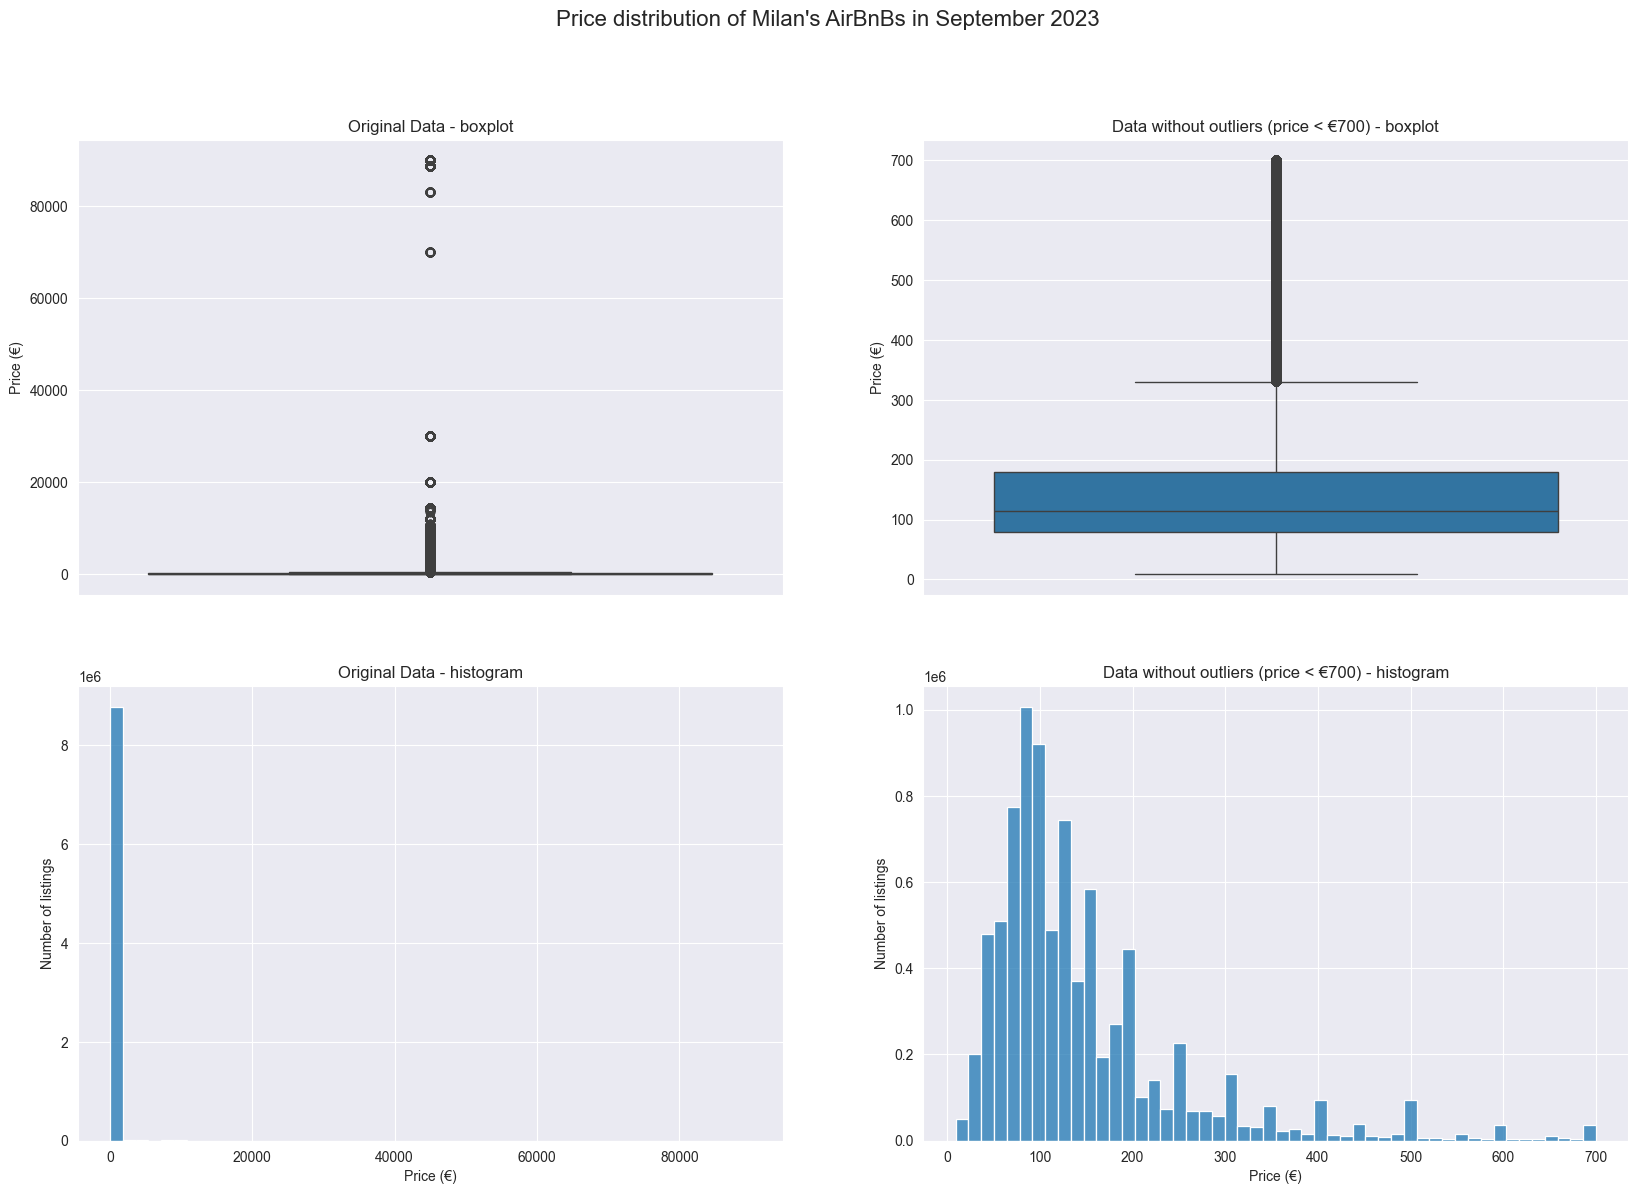

In [29]:
# Create subplot
fig, axes = plt.subplots(
    nrows=2, 
    ncols=2,
    figsize=(20,13)
)

# Set up style
sns.set_style("darkgrid")

# Title
fig.suptitle(
    "Price distribution of Milan's AirBnBs in September 2023",
    fontsize = 16)

# Price boxplot (all observations)
sns.boxplot(
    data = calendar,
    y = 'price',
    ax = axes[0,0]
)
axes[0,0].set_title("Original Data - boxplot")
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("Price (€)")

# Price boxplot (without outliers)
sns.boxplot(
    data = calendar_no_outliers,
    y = 'price',
    ax = axes[0,1]
)
axes[0,1].set_title("Data without outliers (price < €700) - boxplot")
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("Price (€)")

# Price histogram (all observations)
sns.histplot(
    data=calendar, 
    x="price",
    bins = 50,
    ax = axes[1,0]
    )
axes[1,0].set_title("Original Data - histogram")
axes[1,0].set_xlabel("Price (€)")
axes[1,0].set_ylabel("Number of listings")

# Price histogram (without outliers)
sns.histplot(
    data=calendar_no_outliers, 
    x="price",
    bins = 50,
    ax = axes[1,1]
    )
axes[1,1].set_title("Data without outliers (price < €700) - histogram")
axes[1,1].set_xlabel("Price (€)")
axes[1,1].set_ylabel("Number of listings")

In [30]:
# Show basic descritive statistics to see how they differ across datasets

# Dataset with outliers
price_stats = pd.concat(
    [
        calendar['price'].describe(), 
        pd.Series(calendar['price'].median(), name='Median')
        ], 
    axis=0
    )
price_stats = price_stats.rename(index={0: 'Median'})
price_stats.name = 'Price statistics (with outliers)'

# Dataset without outliers
price_stats_no_outliers = pd.concat(
    [
        calendar_no_outliers['price'].describe(), 
        pd.Series(calendar_no_outliers['price'].median(), name='Median')
        ], 
    axis=0
    )
price_stats_no_outliers = price_stats_no_outliers.rename(index={0: 'Median'})
price_stats_no_outliers.name = 'Price statistics (without outliers)'

# Merge datasets for ease of read
stats = pd.merge(
    price_stats, 
    price_stats_no_outliers, 
    left_index=True,
    right_index=True, 
    how = 'outer')
pd.set_option('display.float_format', lambda x: '%.6f' % x)
pd.reset_option('display.float_format')

# Show stats (not showing count because the dataset is very big and all teh table would be shown in scientific notation)
print(stats[stats.index != 'count'])

        Price statistics (with outliers)  Price statistics (without outliers)
25%                            80.000000                            80.000000
50%                           119.000000                           115.000000
75%                           190.000000                           180.000000
Median                        119.000000                           115.000000
max                         90000.000000                           700.000000
mean                          208.067006                           147.895835
min                             9.000000                             9.000000
std                          1030.790226                           110.661986


Having removed the most extreme observations leads to a data distribution similar to that in the dataset ```listings```.

## Section 2: Exploratory data analysis  
  
In this section I explore the data. In particular, the analysis focusses on:
- distribution of listings prices based on features such as number of bedrooms and property type;
- distribution of listings across Milan's neighbourhoods
- distribution of prices across Milan's neighbourhoods
- evolution of prices over the year

### 2.1 Distribution of prices based on listings features  
  
It is expected that prices differ based on the listing's features.  
In this section boxplots are used to explore the price distribution based on the property type and number of bedrooms.  
  
Additional features may determine different levels of prices such as location or amenities.  
Location is explored later in the section.

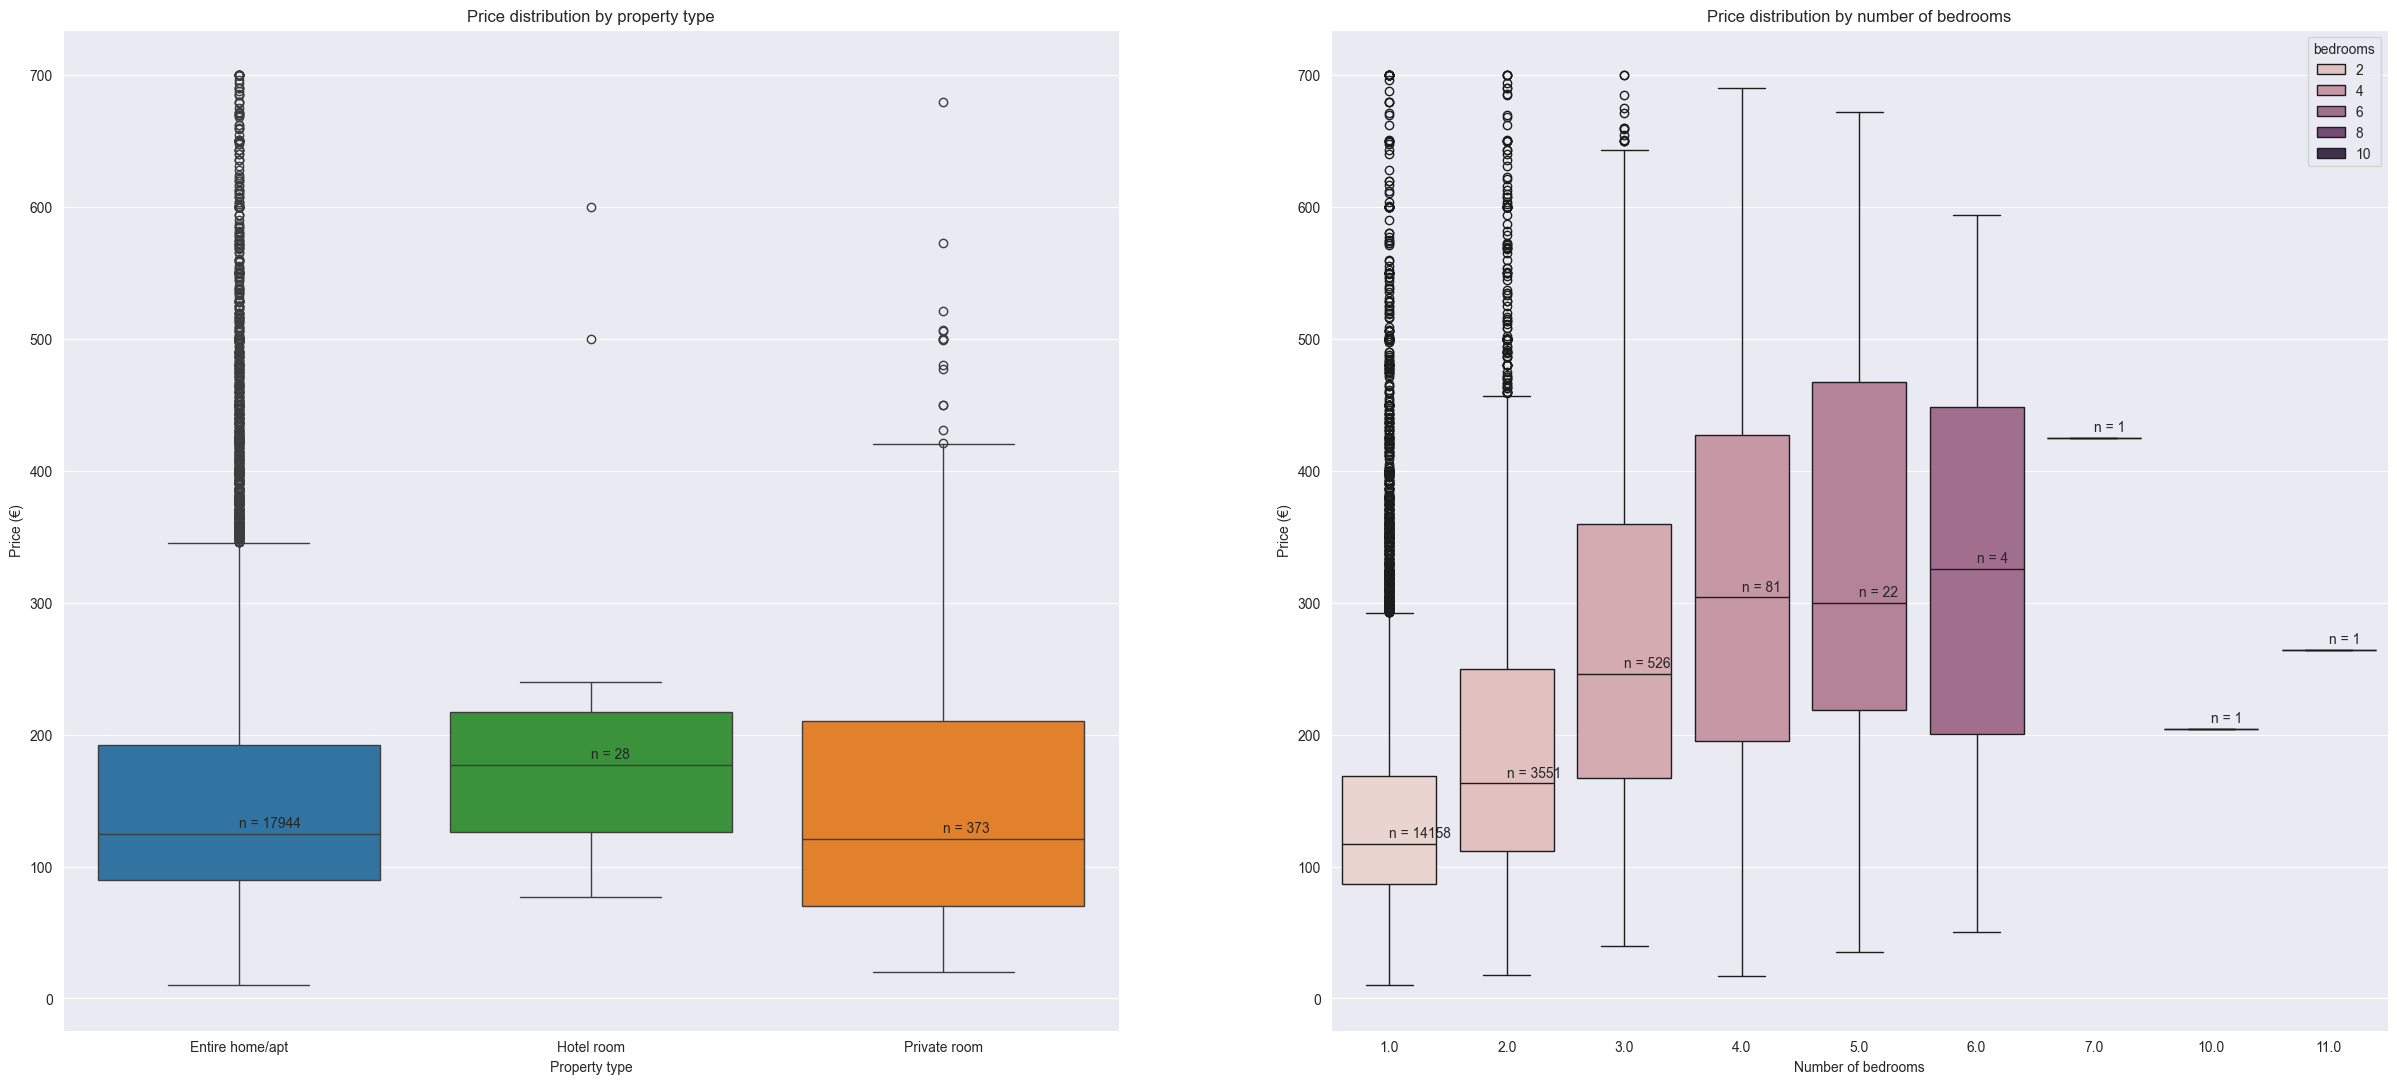

In [31]:
# Set up useful info for the chart
features_list = {
    'room_type' : 
        {'title_name': 'Price distribution by property type', 
        'x_axis_name' : 'Property type'},
    'bedrooms':
        {'title_name': 'Price distribution by number of bedrooms', 
        'x_axis_name' : 'Number of bedrooms'}
    }

features_list_table = pd.DataFrame(features_list)

# Draw figure
fig, axes = plt.subplots(
    nrows=1, 
    ncols=2,
    figsize=(30,13)
)

# Price by room type

chart_pos = 0
for f in features_list_table.columns:

    # List of room types (used to ensure that the order of how the data is shows is the same as the labels pasted over)
    p_types = np.unique(listings[f])

    # Plot data
    boxplot_axis = sns.boxplot(
        data = listings,
        y = 'price',
        x = f,
        ax = axes[chart_pos],
        order = p_types,
        hue = f
    )

    # Add labels with number of observations
    for p_type in p_types:
        # X coodinate of the label set as the indices of the property type for which we are calculating the observations
        x = np.argmax(p_types == p_type)
        # Y coordinate is set to be slightly above the median line
        y = np.median(listings[listings[f] == p_type]['price']) + 5
        # Calculate number of observations
        nobs = listings[listings[f] == p_type].shape[0]
        # create label
        text = f"n = {nobs}"
        #print(f"{x} {num_bedrooms} {np.median(listings[listings['room_type'] == num_bedrooms]['price'])} {y} {text}")

        # Add text to boxplot
        boxplot_axis.text(
            x = x,
            y = y,
            s = text
        )

    axes[chart_pos].set_title(features_list_table.loc['title_name'][f])
    axes[chart_pos].set_ylabel("Price (€)")
    axes[chart_pos].set_xlabel(features_list_table.loc['x_axis_name'][f])
    chart_pos +=1

    

plt.show()

#### Main findings on price distribution by property features
The price distribution by property type shows that:
- The number of listings in hotels much smaller than those listed as entire homes or private rooms. This seems to be in line with the fact that AirBnB was developed mostly to rent private properties.
- Most listings are categorised as 'Entire homes'
- The median price of listings in hotel rooms is the highest, however, not substantially
- There is a long tail of observations above the 75th percentile in the Entire home category.

The price distribution by number of bedrooms shows that:
- there are only very few listings with 6 or more bedrooms. These boxplots will therefore be ignored as they have low statistical validity.
- The remaining of the boxplots show, as expected, that price increases as the number of bedrooms is higher.
 

### 2.2 Distribution of listings across Milan's neighbourhoods and its prices
  
In this section, we present a map that will show:
- the number of listings per neighbourhood;
- the listings average price per neighbourhood;
- the listings median price per neighbourhood. 
  
This data is shown on a map as well as through bar charts, which focus on the top 20 neighbourhoods for number of listings.

In [32]:
# create summary table containing the number of listings, average and median price for each Milan neighbourhood
neighborhood_counts = listings['neighbourhood_cleansed'].value_counts().reset_index()
neighborhood_counts.columns = ['neighbourhood', 'listing_count']

neighborhood_med_price = listings.groupby('neighbourhood_cleansed')['price'].median().reset_index()
neighborhood_med_price.columns = ['neighbourhood', 'median_price']

neighborhood_avg_price = listings.groupby('neighbourhood_cleansed')['price'].mean().reset_index()
neighborhood_avg_price.columns = ['neighbourhood', 'avg_price']

# Merge datasets
neighborhood_summary_stats = pd.merge(
    neighborhood_counts,
    neighborhood_med_price,
    on = 'neighbourhood',
    how = 'left'
)

neighborhood_summary_stats = pd.merge(
    neighborhood_summary_stats,
    neighborhood_avg_price,
    on = 'neighbourhood',
    how = 'left'
)

# Sort the data by 'listing_count' in descending order and identify top 20 neigbourhoods per number of listings
neighborhood_summary_stats = neighborhood_summary_stats.sort_values(by='listing_count', ascending=False)

neighborhood_summary_stats['top_20'] = 0
neighborhood_summary_stats.loc[:19, 'top_20'] = 1

neighborhood_summary_stats['grouped_neighbourhood'] = neighborhood_summary_stats.apply(
    lambda row: row['neighbourhood'] if row['top_20'] == 1 
    else 'Other', axis=1)

The information calculated above is used to create a Choropleth map which allows to visualise how neighbourhoods differ across these three dimensions.

In [33]:
# Set up useful info for the chart
stats_list = {
    'median_price' : 
        {'colour': 'RdYlGn_r', 
        'legend_name' : 'Median price',
        'name' : 'Median price',
        'position' : (0,0)},
    'avg_price':
        {'colour': 'RdBu_r', 
        'legend_name' : 'Average price',
        'name' : 'Average price',
        'position' : (1,0)},
    'listing_count':
        {'colour': 'PRGn_r', 
        'legend_name' : 'Number of listings',
        'name' : 'Number of listings',
        'position' : (0,1)},
    }

stats_list_table = pd.DataFrame(stats_list)
stats_list_table

# Import neighbourhoods
geojson_path = parent_folder+'/MI AirBnB - dataset/neighbourhoods.geojson'

# Identify median latitude and longitude to center the map
median_latitude = listings['latitude'].median()
median_longitude = listings['longitude'].median()

# Draw map
milan_map = folium.Map(
    # starting location
    location = [median_latitude, median_longitude],
    zoom_start = 10.5,
    tiles = 'OpenStreetMap'
)

for stat in stats_list_table.columns:
    cp = folium.Choropleth(
        geo_data=geojson_path,
        data=neighborhood_summary_stats,
        columns=['neighbourhood', stat],
        key_on='feature.properties.neighbourhood',  # GeoJSON property for matching
        fill_color=stats_list_table.loc['colour'][stat],
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=stats_list_table.loc['legend_name'][stat],
        
        highlight= True,
        nan_fill_color="grey",
        name=stats_list_table.loc['name'][stat]
    ).add_to(milan_map)

    # creating a state indexed version of the dataframe so we can lookup values
    data_indexed = neighborhood_summary_stats.set_index('neighbourhood')

    # looping thru the geojson object and adding a new property(unemployment)
    # and assigning a value from our dataframe
    for s in cp.geojson.data['features']:
        #print(s['properties'])
        #print(s['properties']['neighbourhood'])
        try: 
            #print(state_data_indexed.loc[s['properties']['neighbourhood'], 'listing_count'])
            s['properties'][stat] = int(data_indexed.loc[s['properties']['neighbourhood'], stat])
            #print(s['properties']['listing_count'])
        except:
            s['properties'][stat] = 0
        #print(s['properties'])

    folium.GeoJsonTooltip(
        fields=['neighbourhood', stat],
        aliases=['Neighborhood', stats_list_table.loc['name'][stat]],
        labels=True,
        sticky=True,
        style= "background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"
    ).add_to(cp.geojson)


folium.LayerControl(collapsed = False).add_to(milan_map)

milan_map

For ease of read, reported below are the values for the first 20 neighbourhoods for number of listings.

In [34]:
# Add Top categorisation in the full listings dataset

# rename variable for merge
listings['neighbourhood'] = listings['neighbourhood_cleansed']

# Merge datasets
listings_top_20_cat = pd.merge(
    listings,
    neighborhood_summary_stats,
    on = 'neighbourhood',
    how = 'left'
)

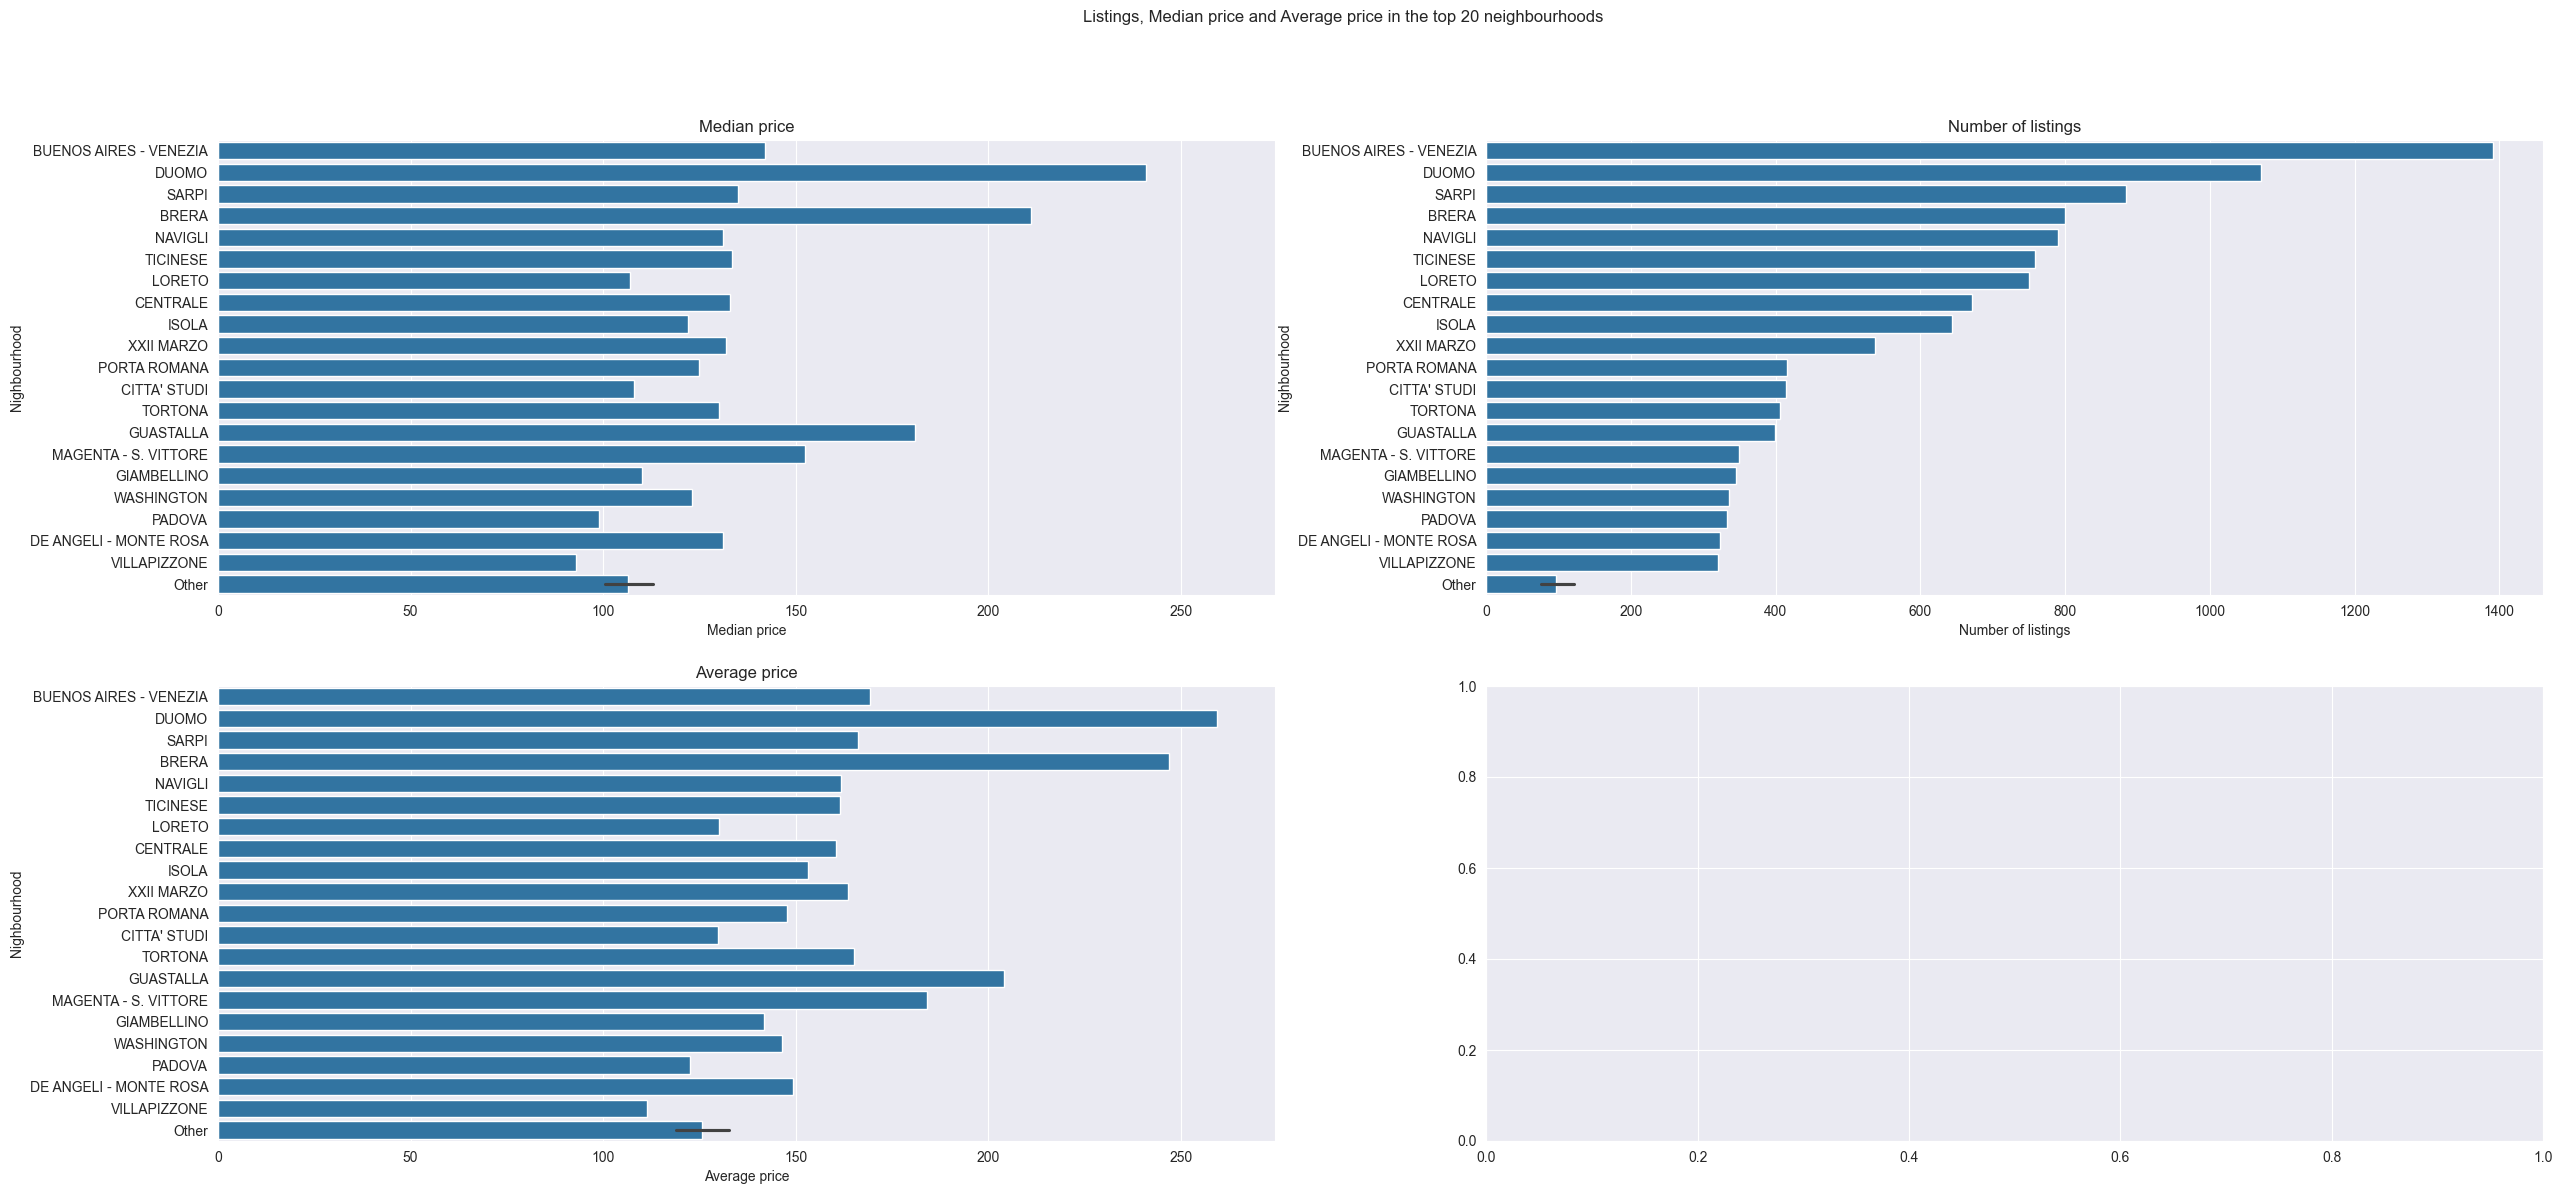

In [35]:
# Define the "subplot".
fig, axes = plt.subplots(
    nrows=2, 
    ncols=2,
    figsize=(30,13)
)

# Set up a stype
sns.set_style("darkgrid")

# Let's add a general title.
fig.suptitle("Listings, Median price and Average price in the top 20 neighbourhoods")

for stat in stats_list_table.columns:
    # Add subtitles to each subplot
    axes[stats_list_table.loc['position'][stat]].set_title(stats_list_table.loc['name'][stat])
    axes[stats_list_table.loc['position'][stat]].set_ylabel("Nighbourhood")
    axes[stats_list_table.loc['position'][stat]].set_xlabel(stats_list_table.loc['name'][stat])

    if stat == 'median_price' or stat == 'avg_price':
        max_x_axis = max(neighborhood_summary_stats[['median_price', 'avg_price']].max())
        axes[stats_list_table.loc['position'][stat]].set_xlim(0, max_x_axis + 15)

    sns.barplot(
        data = neighborhood_summary_stats,
        y = 'grouped_neighbourhood',
        x = stat,
        order = neighborhood_summary_stats.sort_values(
            by = 'listing_count', ascending = False)['grouped_neighbourhood'],
        ax = axes[stats_list_table.loc['position'][stat]]

    )


plt.show()

#### Main findings on price and listings distribution by neighbourhoods
The charts above show that:
- The Buenos aires - Venezia neighbourhood is the one hosting the nighest number of listings. Followed by other central areas such as Duomo and Sarpi.
- Interestingly, the neighbourhoods with the higest median and average prices are Duomo, Brera and Guastalla. These findings are inline with expectations, as these are some of the most central areas in the city. Although included in the category 'Other' Parco Sempione is also one of the areas with highest median price.
- The top 5 neighbourhoods include ~31% of all available listings. The percentage approaches 50% when looking at the top 10. The remaining of the listings are distributed across the remaining 76 neighbourhoods. 
  
Further analysis could be performed to investigate the distribution of extreme observations across neighbourhoords as well as putting these metrics in relation to the dimension or house-density of these areas.


### 2.3 Evolution of prices over the year  
  
The data available shows the listings availability and prices between September 2023 and September 2025.  
The section below explores the evolution of listings prices over time.

#### 2.3.1 Merge datasets  
  
As a preliminary step, the ```listings``` and ```calendar``` datasets are merged.

In [36]:
#Rename listings id so it has the same name in the two datasets
listings = listings.rename(columns={'id': 'listing_id'})

# Merge - we keep all obervations for now (how = outer), 
# but also create a variable which indicates where each observation comes from (indicator=True)
mi_listings = pd.merge(listings, calendar, on='listing_id', how='outer', indicator=True)

In [37]:
mi_listings['_merge'].value_counts()

_merge
both          6695762
right_only    2128328
left_only           0
Name: count, dtype: int64

The indicator variable ```merge``` shows that most listings were present in the same dataset. However, some from the ```calendar``` dataset were not in the ```listings``` one.  
This may have been caused by the cleaning steps applied to the dataset.

For the purpose of this analysis, only variables present in both datasets are kept.

In [38]:
# Extract calendar only data
right_only_data = mi_listings[mi_listings['_merge'] == 'right_only']['listing_id']

mi_listings = mi_listings[mi_listings['_merge'] == 'both']

#### 2.3.2 Evolution of prices over time
  
- how many listings change price over the next year?
- overall, how prices are expected to evolve over the next year

##### 2.3.2.A Proportion of listings whose price change over the year
  
Identify those observations for which prices are expected to change over time.
This is done by comparing the price in the dataset ```listings```, which is the price at which the listing was displayed at the time of the extraction, and the price in the dataset ```calendar```, which is the price listed for a given day.

In [39]:
# Create a variable that performs a rowise comparison of the two prices
mi_listings['equal_prices'] = mi_listings['price_x'] == mi_listings['price_y']

# Create a variable that flags for each id whether the prices are different
mi_listings['equal_prices_for_id'] = mi_listings.groupby('listing_id')['equal_prices'].transform('all')

In [40]:
ids_only = mi_listings[['equal_prices_for_id','listing_id']].drop_duplicates()
ids_only['equal_prices_for_id'] = ids_only['equal_prices_for_id'].replace(
    {True: 'Price constant', False: 'Price varies'}
    )

value_counts = ids_only['equal_prices_for_id'].value_counts()
value_counts

equal_prices_for_id
Price varies      13289
Price constant     5056
Name: count, dtype: int64

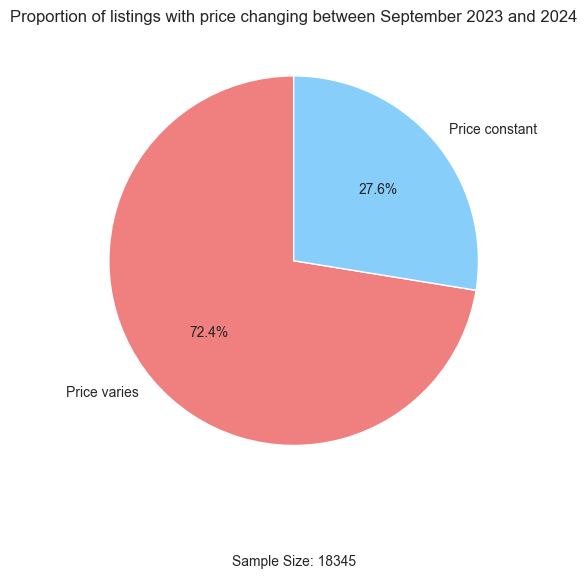

In [41]:
plt.figure(figsize=(6, 6))
plt.pie(
    value_counts, 
    labels=value_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['lightcoral', 'lightskyblue'])
plt.title('Proportion of listings with price changing between September 2023 and 2024')

sample_size = len(ids_only)
plt.text(
    0.5, -0.15, f'Sample Size: {sample_size}', 
    horizontalalignment='center', 
    verticalalignment='center', 
    transform=plt.gca().transAxes
    )

plt.show()

###### Main findings

The chart above shows that over 70% of the listings currently available in Milan are booked with different prices based on the date.
Below we observe how, overall, prices are expected to evolve over time.  
  
Further work could be implemented to analyse the extent of this variation and whether it is correlated with specific characteristics of the listings.

##### Evolution of prices over the year  
  
One of the factors that may explain a variation in prices over time is the booking period.  
Intuitively, hosts may be able to ask for a higher price during holiday periods since it is expected to be a higher demand from tourists.  
  
The chart below illustrates how prices evolve over time and allows to identify potential periods when prices change.

In [42]:
# Helper table to draw chart
stats_info = {
    'mean' : {
        'chart_title' : 'Average price',
        'pos' : (0)
        },
    'median' : {
        'chart_title' : 'Median price',
        'pos' : (1)
        }
}

stats_info_table = pd.DataFrame(stats_info)

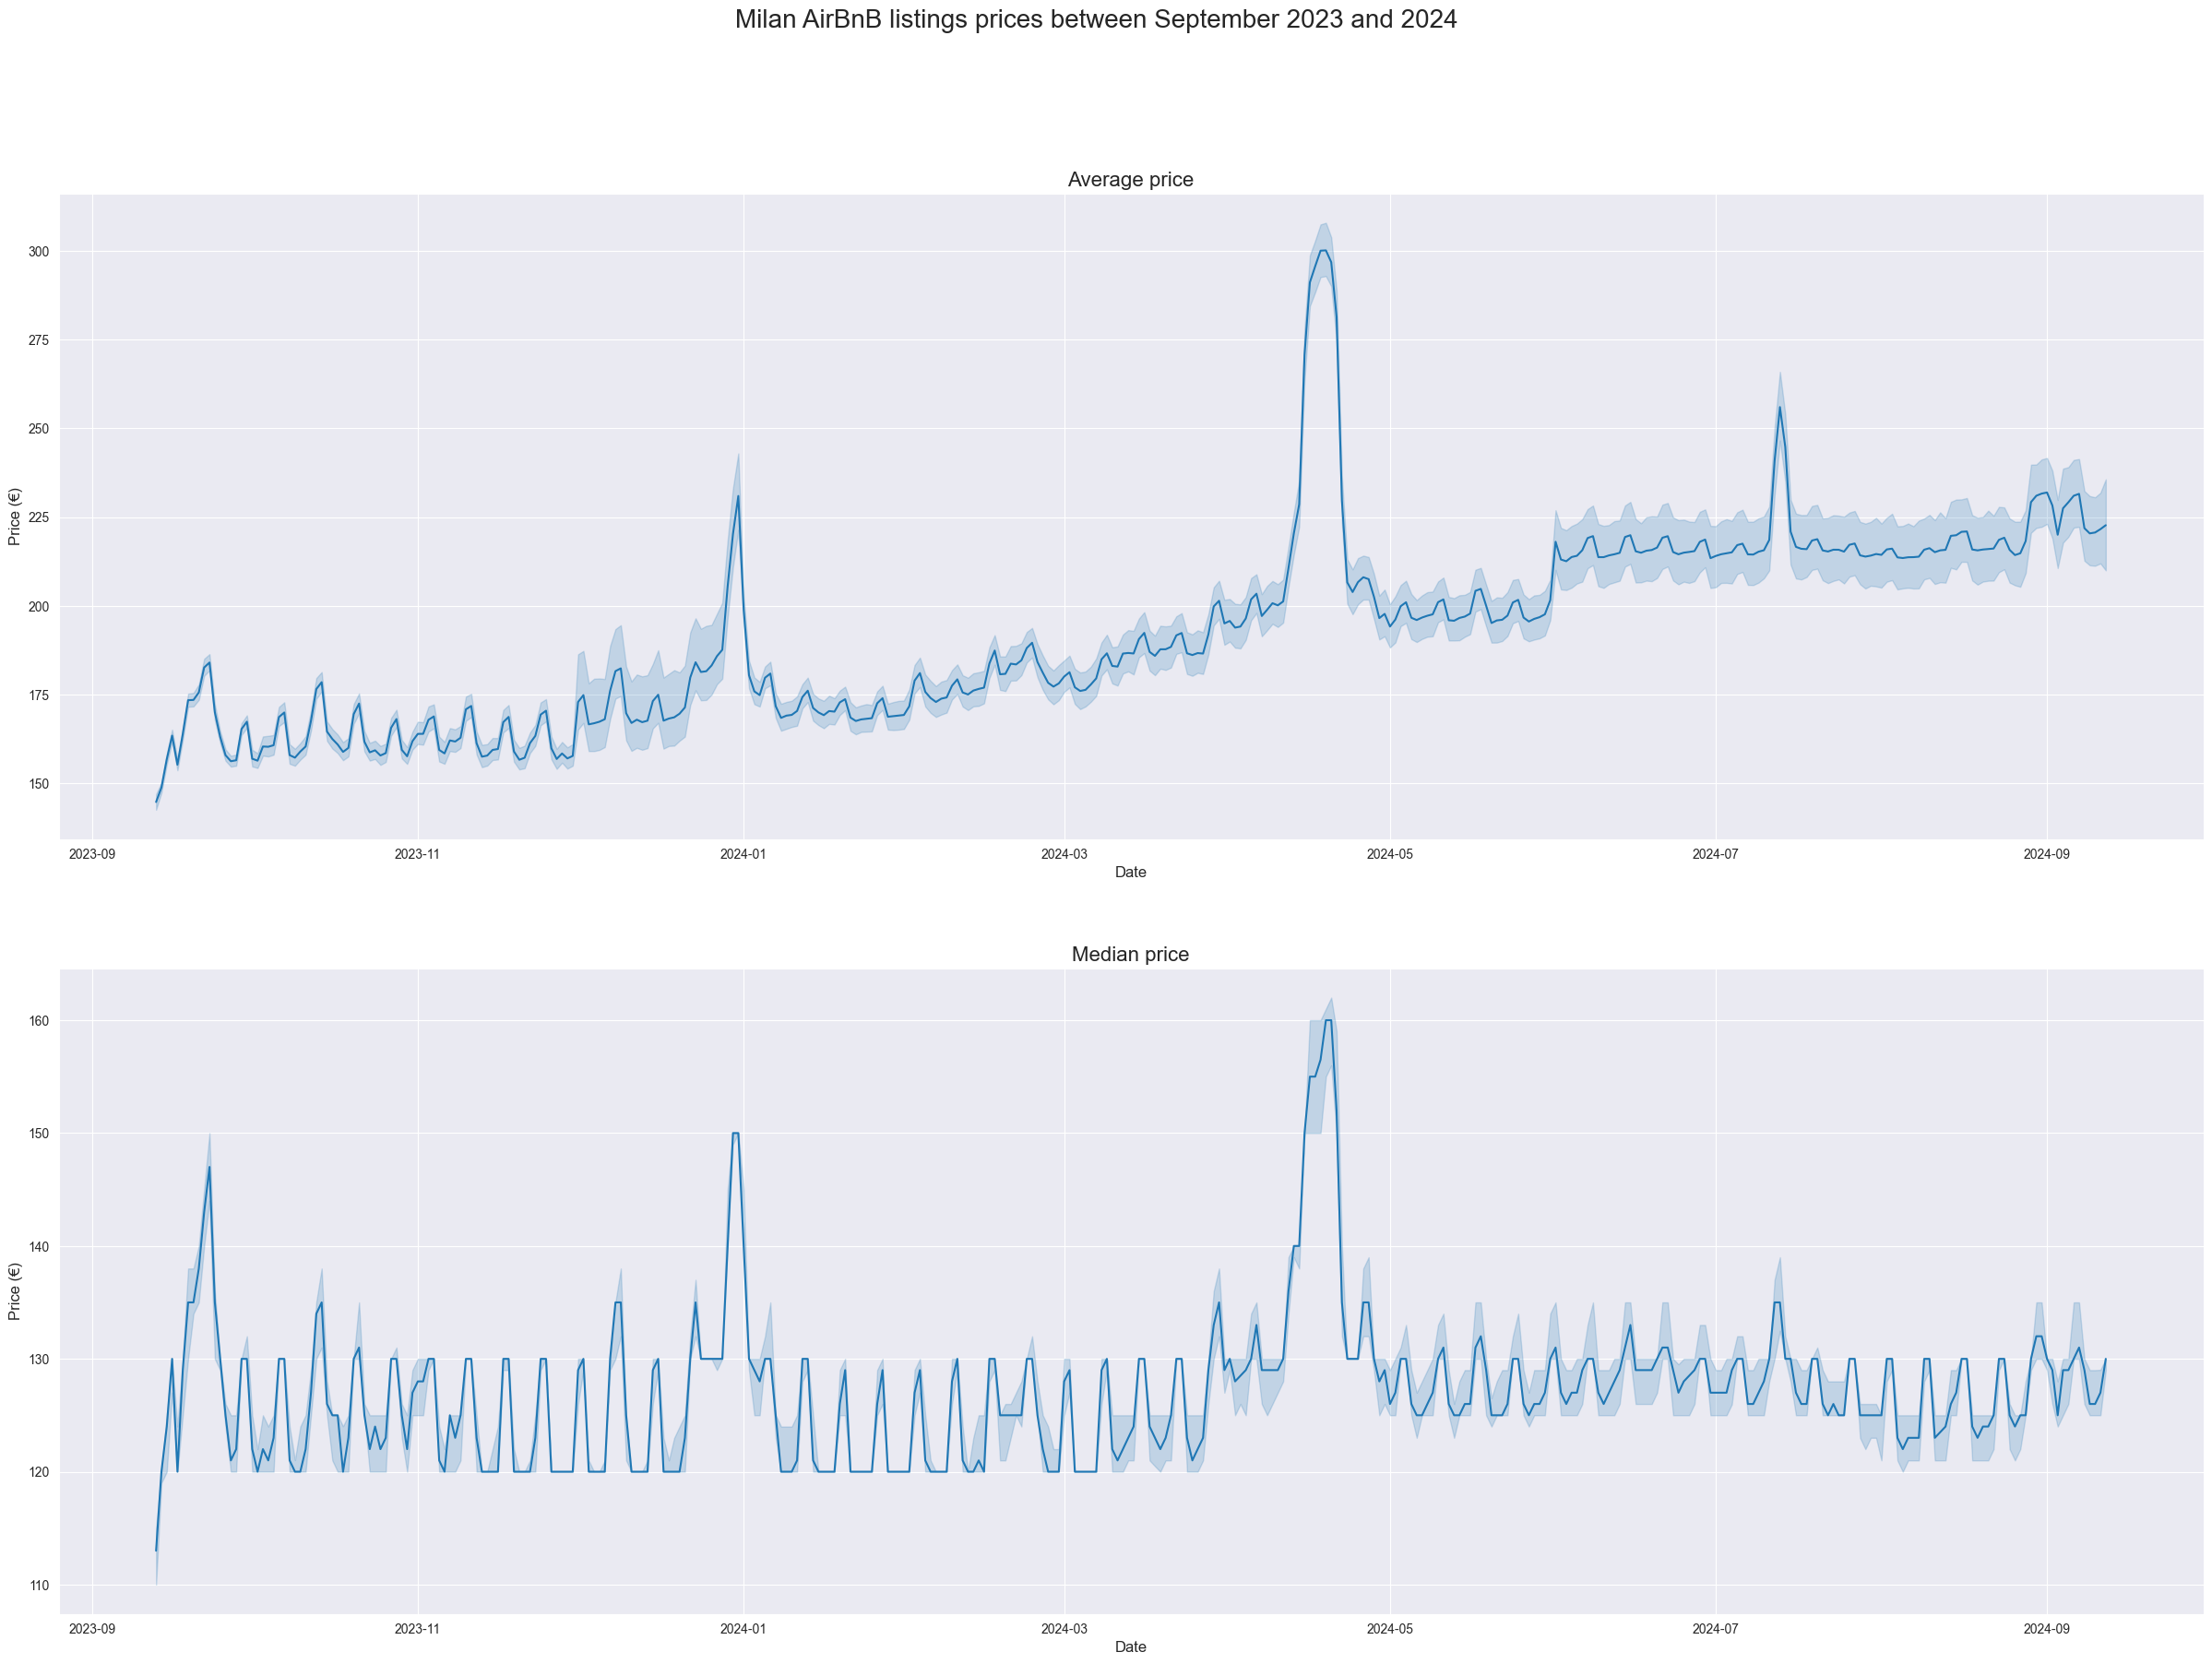

In [47]:
# Define the "subplot".
fig, axes = plt.subplots(
    nrows=2, 
    ncols=1,
    figsize=(30,20)
)

# Set up a stype
sns.set_style("darkgrid")

#Add a general title.
fig.suptitle("Milan AirBnB listings prices between September 2023 and 2024", fontsize=20)

# Draw chart for average and median price
for stat in stats_info_table.columns:
    sns.lineplot(
        data = mi_listings,
        x = "date",
        y = "price_y",
        estimator = stat,
        ax = axes[stats_info_table.loc['pos'][stat]]
    )
    axes[stats_info_table.loc['pos'][stat]].set_title(stats_info_table.loc['chart_title'][stat],
    fontsize = 16)
    axes[stats_info_table.loc['pos'][stat]].set_xlabel('Date', fontsize = 12)
    axes[stats_info_table.loc['pos'][stat]].set_ylabel('Price (€)', fontsize = 12)

###### Main findings
  
The chart above shows the mean and median price (blue line) and its 95% confidence interval.  
- The data present an overall upward trend of the mean price over time, with peaks around end of 2023 and early 2024, end of April and early July.  

- As expected, two of these peaks correspond to the Winter and summer holidays. Interestingly the highest peak occurs at the end of April, which corresponds to when the Salone Internazionale del Mobile is happening.  
Salone Internazionale del Mobile is an international furniture fair, and the largest trade fair in the world.  
  
- Given this, it may be likely that the amount of people that the fair attracts is above the quantity of tourists visiting the city during the holiday periods, therefore creating more demand for accommodation.  
It would also be reasonable to expect that the people coming to Milan for the fair may be entrepreneurs and tradesmen and women and, given the business nature of their visit, they may also be willing to pay extra to find accommodation. This could be another  driver of such peak in April. 

- It is interesting to note that, although to a less extend the same trends are visible for the median price. This suggests that the trend observed with the average price is not solely driven by listings with extremely high prices.


Further work could be implemented to explore whether this trend differs across characteristics of the listings and neighbourhoods, as well as putting this findings in relation to the purpose of the trip.